In [4]:
import os
from shutil import copyfile

In [5]:
######################################################################
# Prepare dataset for training
# You only need to change this line to your dataset download path
# --------------------------------------------------------------------

download_path = '/home/zhengwei/Desktop/Zhengwei/Projects/datasets/DukeMTMC-reID'

if 'cuhk' in download_path:
    suffix = 'png'
else:
    suffix = 'jpg'

if not os.path.isdir(download_path):
    print('please change the download_path')

save_path = download_path + '/pytorch'
if not os.path.isdir(save_path):
    os.mkdir(save_path)

In [6]:
query_path = download_path + '/query'
query_save_path = download_path + '/pytorch/query'
if not os.path.isdir(query_save_path):
    os.mkdir(query_save_path)
    
for root, dirs, files in os.walk(query_path, topdown=True):
    for name in files:
        if not name[-3:] == suffix:
            continue
        ID = name.split('_')
        src_path = query_path + '/' + name
        dst_path = query_save_path + '/' + ID[0]
        if not os.path.isdir(dst_path):
            os.mkdir(dst_path)
        copyfile(src_path, dst_path + '/' + name)

In [7]:
# gallery
gallery_path = download_path + '/bounding_box_test'
gallery_save_path = download_path + '/pytorch/gallery'
if not os.path.isdir(gallery_save_path):
    os.mkdir(gallery_save_path)

for root, dirs, files in os.walk(gallery_path, topdown=True):
    for name in files:
        if not name[-3:] == suffix:
            continue
        ID = name.split('_')
        src_path = gallery_path + '/' + name
        dst_path = gallery_save_path + '/' + ID[0]
        if not os.path.isdir(dst_path):
            os.mkdir(dst_path)
        copyfile(src_path, dst_path + '/' + name)

In [8]:
# ---------------------------------------
# train_all
train_path = download_path + '/bounding_box_train'
train_save_path = download_path + '/pytorch/train_all'
if not os.path.isdir(train_save_path):
    os.mkdir(train_save_path)

for root, dirs, files in os.walk(train_path, topdown=True):
    for name in files:
        if not name[-3:] == suffix:
            continue
        ID = name.split('_')
        src_path = train_path + '/' + name
        dst_path = train_save_path + '/' + ID[0]
        if not os.path.isdir(dst_path):
            os.mkdir(dst_path)
        copyfile(src_path, dst_path + '/' + name)

In [31]:
train_path = download_path + '/bounding_box_train'
cnt = 0
root, dirs, files = next(os.walk(train_path, topdown=True))

print(root)

D:\Datasets\DukeMTMC-reID/bounding_box_train


### Official code of Open-Clip

In [ ]:
import torch
from PIL import Image
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
tokenizer = open_clip.get_tokenizer('ViT-B-32')

image = preprocess(Image.open("CLIP.png")).unsqueeze(0)

text = tokenizer(["a diagram", "a dog", "a cat"])

with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

print("Label probs:", text_probs)  # prints: [[1., 0., 0.]]

In [4]:
import open_clip

models = open_clip.list_pretrained()
for model in models:
    if "ViT-B-16" in model[0]:
        print(model)

('ViT-B-16', 'openai')
('ViT-B-16', 'laion400m_e31')
('ViT-B-16', 'laion400m_e32')
('ViT-B-16', 'laion2b_s34b_b88k')
('ViT-B-16', 'datacomp_xl_s13b_b90k')
('ViT-B-16', 'datacomp_l_s1b_b8k')
('ViT-B-16', 'commonpool_l_clip_s1b_b8k')
('ViT-B-16', 'commonpool_l_laion_s1b_b8k')
('ViT-B-16', 'commonpool_l_image_s1b_b8k')
('ViT-B-16', 'commonpool_l_text_s1b_b8k')
('ViT-B-16', 'commonpool_l_basic_s1b_b8k')
('ViT-B-16', 'commonpool_l_s1b_b8k')
('ViT-B-16', 'dfn2b')
('ViT-B-16-quickgelu', 'metaclip_400m')
('ViT-B-16-quickgelu', 'metaclip_fullcc')
('ViT-B-16-plus-240', 'laion400m_e31')
('ViT-B-16-plus-240', 'laion400m_e32')
('ViT-B-16-SigLIP', 'webli')
('ViT-B-16-SigLIP-256', 'webli')
('ViT-B-16-SigLIP-i18n-256', 'webli')
('ViT-B-16-SigLIP-384', 'webli')
('ViT-B-16-SigLIP-512', 'webli')


### For feature extraction

In [8]:
import torch
from PIL import Image
import open_clip
import os
import tqdm

suffix = '.jpg'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k', device=device)
model, _, preprocess = open_clip.create_model_and_transforms('ViT-L-14', pretrained='openai', device=device)

base_path = '/home/zhengwei/Desktop/Zhengwei/Projects/datasets/DukeMTMC-reID/'
folder = 'query'

train_path = os.path.join(base_path, 'pytorch', folder)

print('train_path:', train_path)

feature_path = os.path.join(base_path,'tensor/ViT-L-14', folder)

# images_feature = {}
# get all folders in the train_path
cnt = 0
dirs = os.listdir(train_path)
for dir in tqdm.tqdm(dirs):
    feature_root= os.path.join(feature_path, dir)
    os.makedirs(feature_root, exist_ok=True)
        
    root, _, files = next(os.walk(train_path + '/' + dir))
    for name in files:
        pre, ext = os.path.splitext(name)
        if ext != suffix:
            continue
        single_image_path = os.path.join(root, name)
        single_image = preprocess(Image.open(single_image_path)).unsqueeze(0)
        with torch.no_grad(), torch.cuda.amp.autocast():
            single_image_features = model.encode_image(single_image.cuda())
            single_image_features /= single_image_features.norm(dim=-1, keepdim=True)
            # images_feature[name] = single_image_features
            torch.save(single_image_features, os.path.join(feature_root, pre + '.pt'))

train_path: /home/zhengwei/Desktop/Zhengwei/Projects/datasets/DukeMTMC-reID/pytorch/query


100%|██████████| 702/702 [01:16<00:00,  9.13it/s]


In [19]:
import torch
single_tensor_path = "/home/zhengwei/Desktop/Zhengwei/Projects/datasets/DukeMTMC-reID/tensor/ViT-SO400M-14-SigLIP-384-webli/query/0005/0005_c2_f0046985.pt"
single_tensor = torch.load(single_tensor_path)
print(single_tensor.shape)

torch.Size([1, 1152])


: 

In [45]:
single_image_path = "/home/zhengwei/Desktop/Zhengwei/Projects/datasets/DukeMTMC-reID/pytorch/train_all/4509/4509_c7_f0115296.jpg"
single_image = preprocess(Image.open(single_image_path)).unsqueeze(0)

print(single_image.shape)
print(images_feature.keys())

# print("4509_1",images_feature["4509_c7_f0115296.jpg"])

print("4509_2", images_feature["4509_c6_f0110933.jpg"])

probs = (images_feature["4509_c7_f0115296.jpg"] @ images_feature["4509_c6_f0110933.jpg"].T)

print(probs)

torch.Size([1, 3, 224, 224])
dict_keys(['4509_c7_f0115296.jpg', '4509_c6_f0110933.jpg', '4509_c6_f0111053.jpg', '4509_c6_f0111173.jpg', '4509_c7_f0114936.jpg', '4509_c6_f0110573.jpg', '4509_c6_f0110693.jpg', '4509_c8_f0088504.jpg', '4509_c7_f0115056.jpg', '4509_c6_f0110813.jpg', '4509_c8_f0088384.jpg', '4509_c7_f0115176.jpg', '4509_c8_f0088264.jpg'])
4509_2 tensor([[-1.9592e-02, -1.3086e-01,  2.7985e-02, -5.6305e-02, -1.4107e-02,
         -9.5596e-03,  1.4175e-02,  3.3722e-02,  7.2823e-03, -9.1934e-03,
          3.3684e-03,  1.9372e-04,  1.0712e-02, -1.5579e-02, -8.7814e-03,
         -2.6596e-02,  1.7407e-01,  4.4281e-02,  3.4271e-02, -3.7811e-02,
          4.6906e-02,  1.3542e-02, -5.8380e-02, -1.3527e-02, -1.1978e-02,
         -2.3708e-03, -1.0612e-02, -1.2589e-02,  5.1971e-02,  8.5144e-03,
         -5.5023e-02,  1.9150e-02, -1.6006e-02,  4.3793e-02,  2.6810e-02,
          3.6621e-02, -9.5215e-03, -2.4796e-02, -5.4016e-03,  7.9269e-03,
          1.8219e-02, -2.7191e-02, -4.4312e-02, 

In [23]:
print(len(images_feature))

16522


In [58]:
from fast_pytorch_kmeans import KMeans, MultiKMeans
from collections import Counter
import torch

kmeans = KMeans(n_clusters=21, mode='euclidean', verbose=1)
x = torch.randn(16522, 512, device='cuda')
labels = kmeans.fit_predict(x)

print(labels.shape)
# count the number of samples in each cluster, with sorted order
print(Counter(labels.cpu().numpy()).most_common())

used 55 iterations (0.0599s) to cluster 16522 items into 21 clusters
torch.Size([16522])
[(17, 931), (2, 906), (18, 903), (6, 901), (7, 897), (13, 895), (14, 869), (12, 821), (11, 818), (15, 811), (16, 809), (3, 794), (1, 785), (20, 777), (19, 768), (10, 760), (0, 708), (5, 678), (8, 610), (4, 577), (9, 504)]


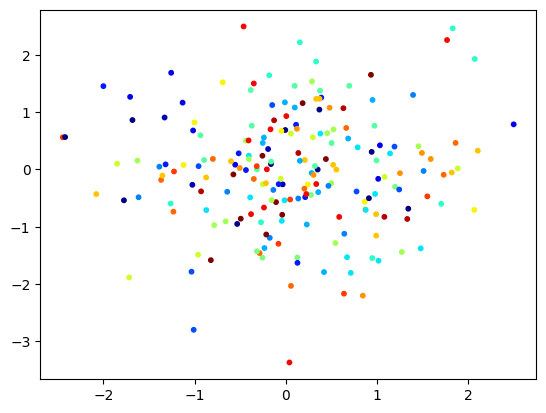

In [71]:
import matplotlib.pyplot as plt

data = x.cpu().numpy()
plt.scatter(data[:200, 0], data[:200, 1], c=labels[:200], s=10, cmap="jet")

torch.Size([21, 512])


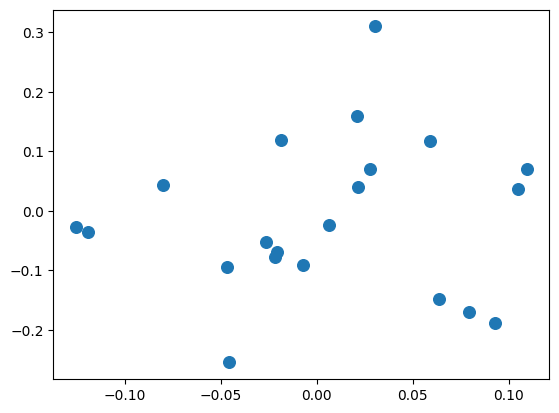

In [73]:
centroids = kmeans.centroids
print(centroids.shape)
centroids = centroids.cpu().numpy()
plt.scatter(centroids[:, 0], centroids[:, 1], s=70)
plt.show()

In [1]:
from fast_pytorch_kmeans import KMeans
import torch
import argparse
import numpy as np
import os
import os.path as osp
import glob
import re
from collections import Counter

In [55]:
data_path = '/home/zhengwei/Desktop/Zhengwei/Projects/datasets/DukeMTMC-reID'
dir_path =  osp.join(data_path, 'tensor', 'Transreid', 'train_all')
tensor_paths = glob.glob(osp.join(dir_path, '*/*.pt'))

all_tensors = []
for tensor_path in tensor_paths:
    tensor = torch.load(tensor_path)
    all_tensors.append(tensor)
all_tensors = torch.cat(all_tensors, dim=0)
all_tensors = all_tensors.cpu().numpy()

print(all_tensors.shape)

(16522, 768)


In [56]:
kmeans_file = '/home/zhengwei/Desktop/Zhengwei/Projects/datasets/DukeMTMC-reID/kmeans_results/Transreid/train_all_25k_euclidean.pt'
results = torch.load(kmeans_file)

labels = results['labels']
centroids = results['centroids']
path2label = results['path2label']

labels = labels.cpu().numpy()
counter = Counter(labels)
sorted_counter = sorted(counter.items(), key=lambda x: x[0])  # sort by element
print("Clustering stastistics:", sorted_counter)

Clustering stastistics: [(0, 907), (1, 201), (2, 425), (3, 794), (4, 773), (5, 586), (6, 919), (7, 345), (8, 656), (9, 692), (10, 548), (11, 752), (12, 1063), (13, 327), (14, 848), (15, 129), (16, 915), (17, 878), (18, 573), (19, 962), (20, 654), (21, 292), (22, 930), (23, 790), (24, 563)]


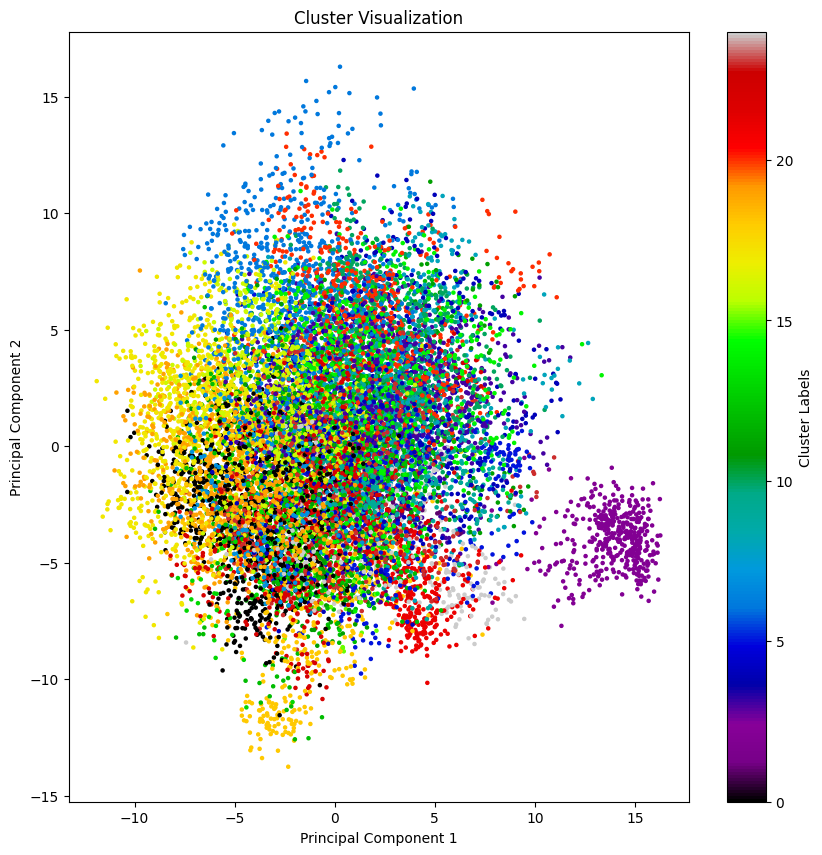

In [57]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming `all_tensors` is your high-dimensional data and `labels` is the corresponding cluster labels
all_tensors = all_tensors # Convert tensors to numpy arrays for sklearn
labels = labels

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_tensors = pca.fit_transform(all_tensors)

# Create a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(reduced_tensors[:, 0], reduced_tensors[:, 1], c=labels, cmap='nipy_spectral', s=5)
plt.colorbar(label='Cluster Labels')  # Show cluster labels as colorbar
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.savefig('pca_25.png')

plt.show()



In [58]:
from sklearn.manifold import TSNE

# Assuming `all_tensors` is your high-dimensional data and `labels` is the corresponding cluster labels
all_tensors = all_tensors  # Convert tensors to numpy arrays for sklearn
labels = labels

# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2)
reduced_tensors = tsne.fit_transform(all_tensors)



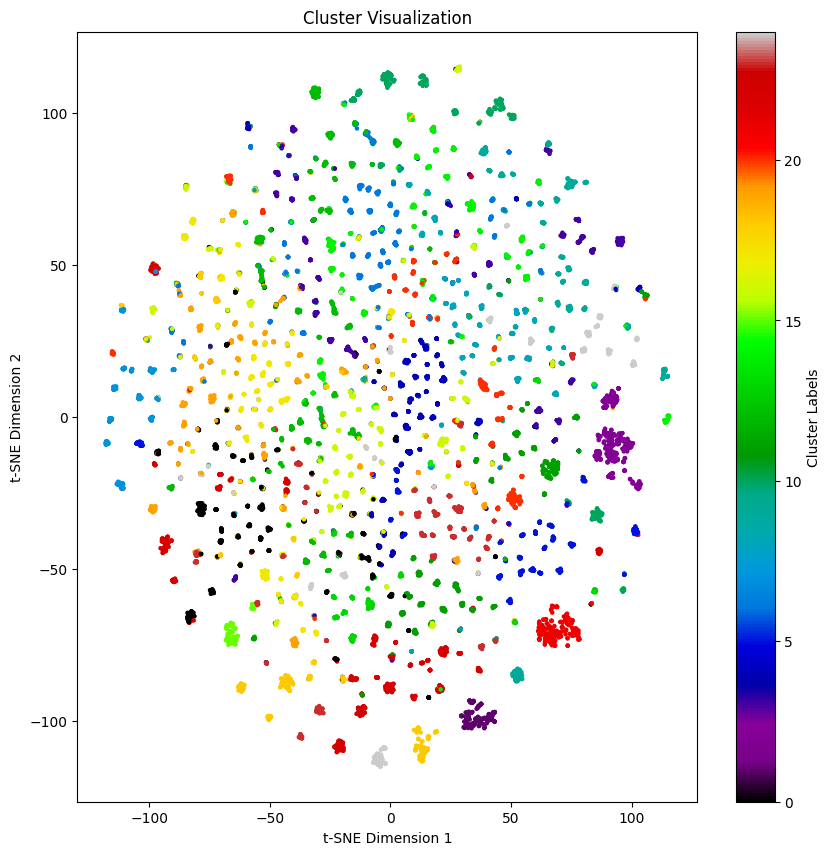

: 

In [59]:
# Create a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(reduced_tensors[:, 0], reduced_tensors[:, 1], c=labels, cmap='nipy_spectral', s=5)
plt.colorbar(label='Cluster Labels')  # Show cluster labels as colorbar
plt.title('Cluster Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# save the figure
plt.savefig('tsne_25.png')

plt.show()

